In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
data = pd.read_csv('./titanic (1).csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
data.drop(columns=['Cabin','Embarked'],inplace=True)

In [6]:
data.Age.fillna(data.Age.mean(),inplace=True)

In [7]:
data.drop(columns='Ticket',inplace=True)
pd.set_option('display.max_columns',30)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [8]:
le = LabelEncoder()

In [9]:
data['Sex'] = le.fit_transform(data['Sex'])

In [10]:
data.drop(columns=['PassengerId','Name'],inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [12]:
x = data.iloc[:,1:].values

In [13]:
y = data.iloc[:,0].values

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)

In [16]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

### Model selection using cross validation

In [17]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("Cross validation model :{}".format(name))
    print("Mean score: ",np.mean(scores)*100)
    print("*"*100)

Cross validation model :LogisticRegression
Mean score:  78.90012484394506
****************************************************************************************************
Cross validation model :DecisionTreeClassifier
Mean score:  77.33333333333333
****************************************************************************************************
Cross validation model :RandomForestClassifier
Mean score:  81.15480649188514
****************************************************************************************************
Cross validation model :AdaBoostClassifier
Mean score:  80.36704119850187
****************************************************************************************************
Cross validation model :GradientBoostingClassifier
Mean score:  83.6179775280899
****************************************************************************************************
Cross validation model :KNeighborsClassifier
Mean score:  81.15355805243446
**********************************

### selecting gradient boosting classifier

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
model = GradientBoostingClassifier()

In [26]:
model.fit(x_train, y_train)
print("Model trained with Gradient Boosting Classifier")
score_train = accuracy_score(y_train, model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("confusion_matrix train is:",con_train)
print("Confusion_matrix test is",con_test)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model trained with Gradient Boosting Classifier
Model accuracy on train is: 0.9044943820224719
Model accuracy on test is : 0.8268156424581006
confusion_matrix train is: [[421  18]
 [ 50 223]]
Confusion_matrix test is [[102   8]
 [ 23  46]]
wrong predictions made: (31, '/', 179)


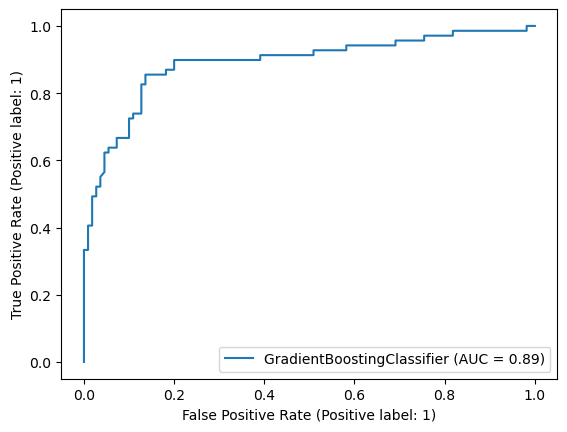

In [27]:
ROC_display = RocCurveDisplay.from_estimator(model,x_test,y_test)